In [36]:
import pandas as pd

### load data
sentences = pd.read_csv('story_liwc_author_sentences.csv.gz', compression='gzip')
sentences.shape

(134955, 71)

In [37]:
### select self sentences
me_sentences = sentences[sentences['i']>0]
me_sentences.shape

(38948, 71)

In [38]:
### strip accent function
import unicodedata
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [39]:
import nltk
reg_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

sentences_tokens = []
unique_tokens = set()
tokens_count = []

### compute tokens
for sentence in me_sentences.sentence:
    tokens = reg_tokenizer.tokenize(sentence)
    normalize_tokens = [remove_accents(w.lower()) for w in tokens]
    sentences_tokens.extend( normalize_tokens )
    unique_tokens |= set(normalize_tokens)
    tokens_count.append(len(normalize_tokens))
    
### tokens stats    
print ('Tokens: ',len(sentences_tokens))
print ('Mean Tokens per Sentence: ', len(sentences_tokens) / len(me_sentences))
print ('Unique Tokens: ',len(unique_tokens))

Tokens:  934977
Mean Tokens per Sentence:  24.005776933347025
Unique Tokens:  44648


In [40]:
### more tokens stats
me_sentences['wc'] = tokens_count
print('mean:', me_sentences['wc'].mean())
print('std:', me_sentences['wc'].std())
print('median:', me_sentences['wc'].median())

mean: 24.0057769333
std: 21.2500501512
median: 19.0


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


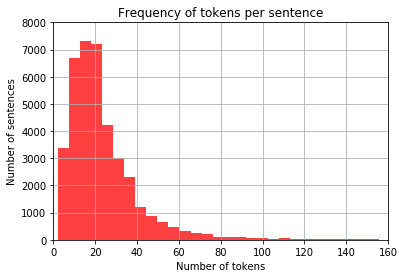

In [41]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### tokens histogram
n, bins, patches = plt.hist(tokens_count, 104, facecolor='red', alpha=0.75)

plt.xlabel('Number of tokens')
plt.ylabel('Number of sentences')
plt.title('Frequency of tokens per sentence')
plt.axis([0, 160, 0, 8000])
plt.grid(True)

plt.show()

In [42]:
### emotion stats
print('Positive sentences: ', len(me_sentences[me_sentences['posemo']>0]))
print('Negative sentences: ', len(me_sentences[me_sentences['negemo']>0]))
print('Anger sentences: ', len(me_sentences[me_sentences['anger']>0]))
print('Sad sentences: ', len(me_sentences[me_sentences['sad']>0]))

Positive sentences:  24298
Negative sentences:  14712
Anger sentences:  5784
Sad sentences:  7618


In [43]:
## select median token sentences
median_sentences = me_sentences[me_sentences['wc'] > 10]
median_sentences = median_sentences[median_sentences['wc'] < 30]
len(median_sentences)

22348

In [44]:
### emotion stats for median sentences
print('Positive sentences: ', len(median_sentences[median_sentences['posemo']>0]))
print('Negative sentences: ', len(median_sentences[median_sentences['negemo']>0]))
print('Anger sentences: ', len(median_sentences[median_sentences['anger']>0]))
print('Sad sentences: ', len(median_sentences[median_sentences['sad']>0]))

Positive sentences:  13559
Negative sentences:  7764
Anger sentences:  2808
Sad sentences:  3750
